In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('Sales Dataset.csv')

# Remove the unnamed index column
df = df.drop(df.columns[0], axis=1)

print("=== SALES DATASET ANALYSIS ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

=== SALES DATASET ANALYSIS ===
Dataset shape: (1000, 7)
Columns: ['Date', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


1. EXPLORATORY DATA ANALYSIS

Basic Statistics:
              Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000

Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Gender            1000 non-null   object
 2   Age               1000 non-null   int64 
 3   Product Category  1000 non-null   object


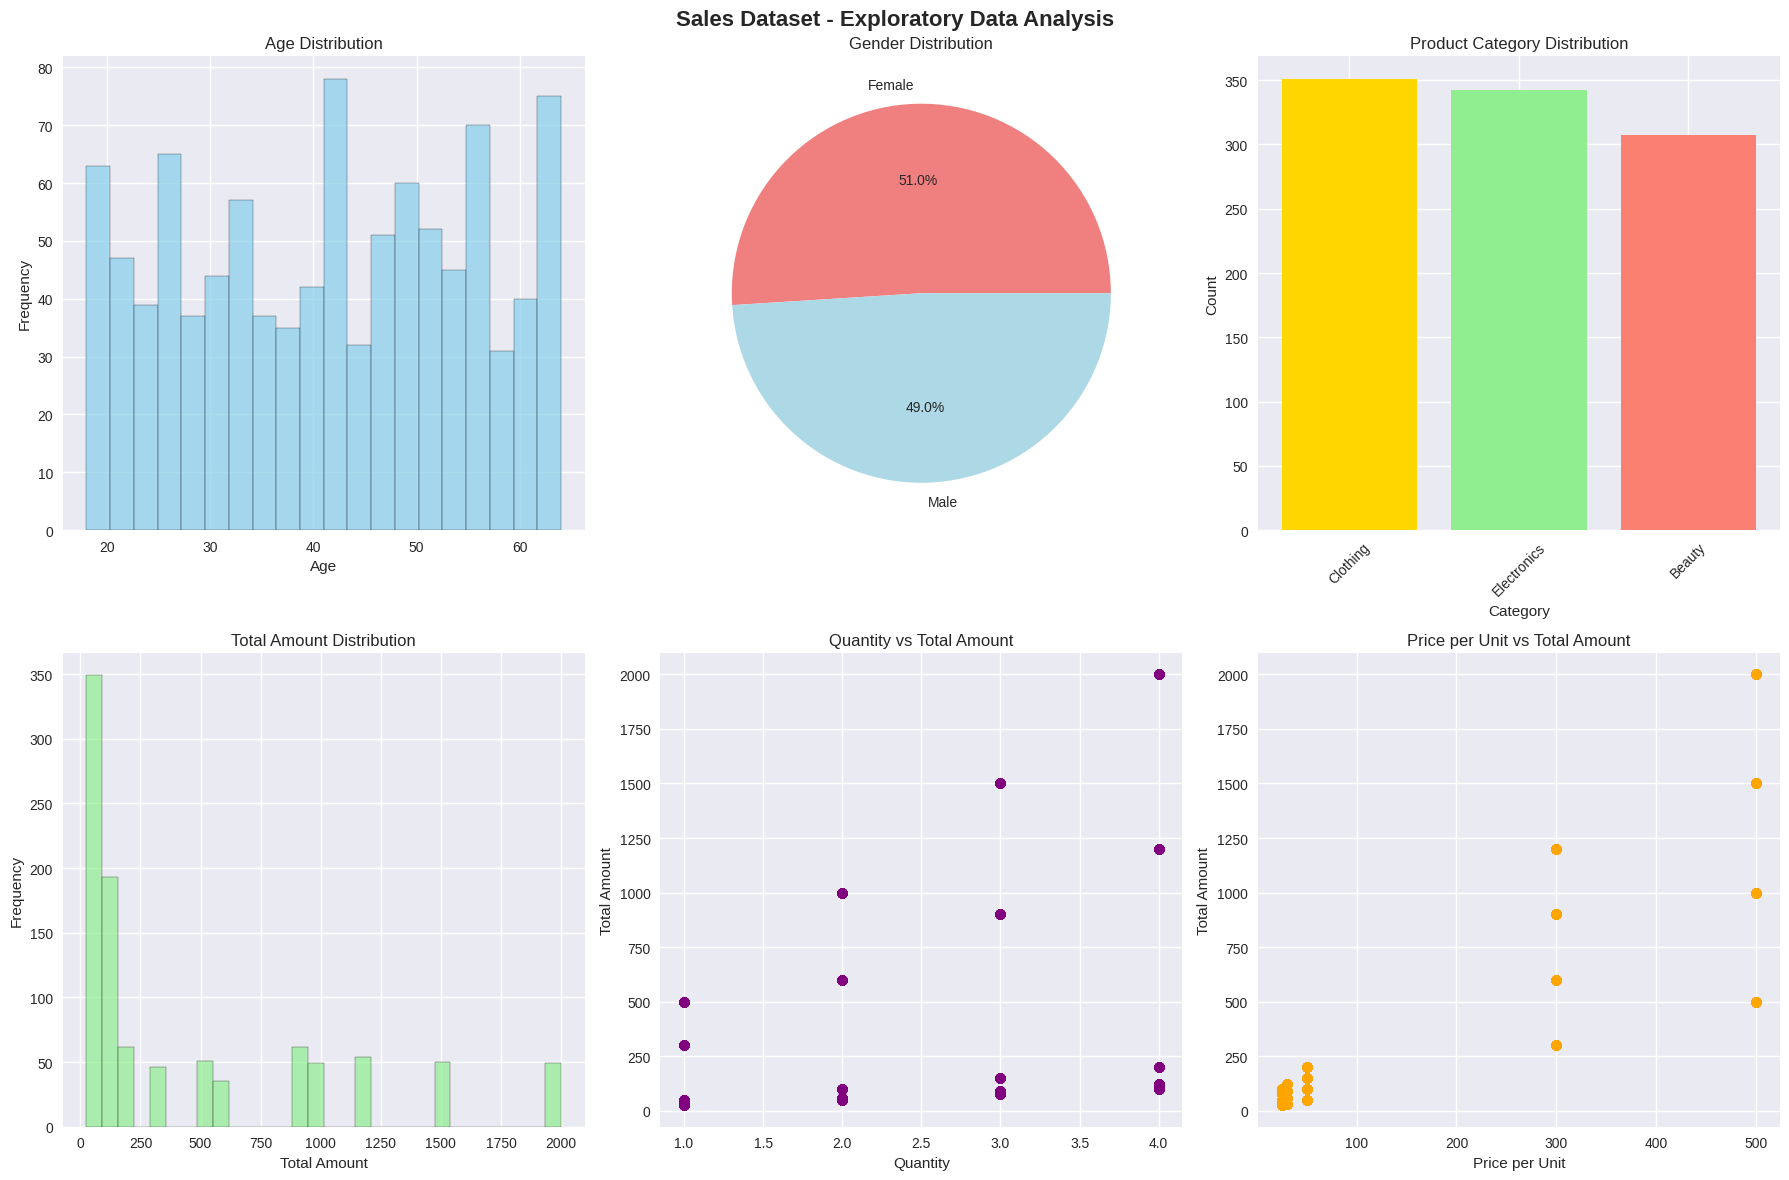

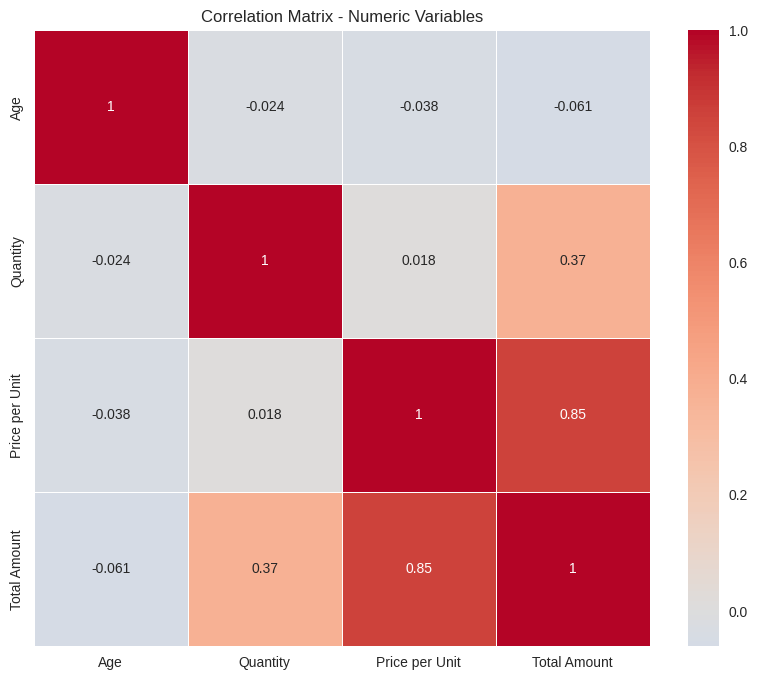

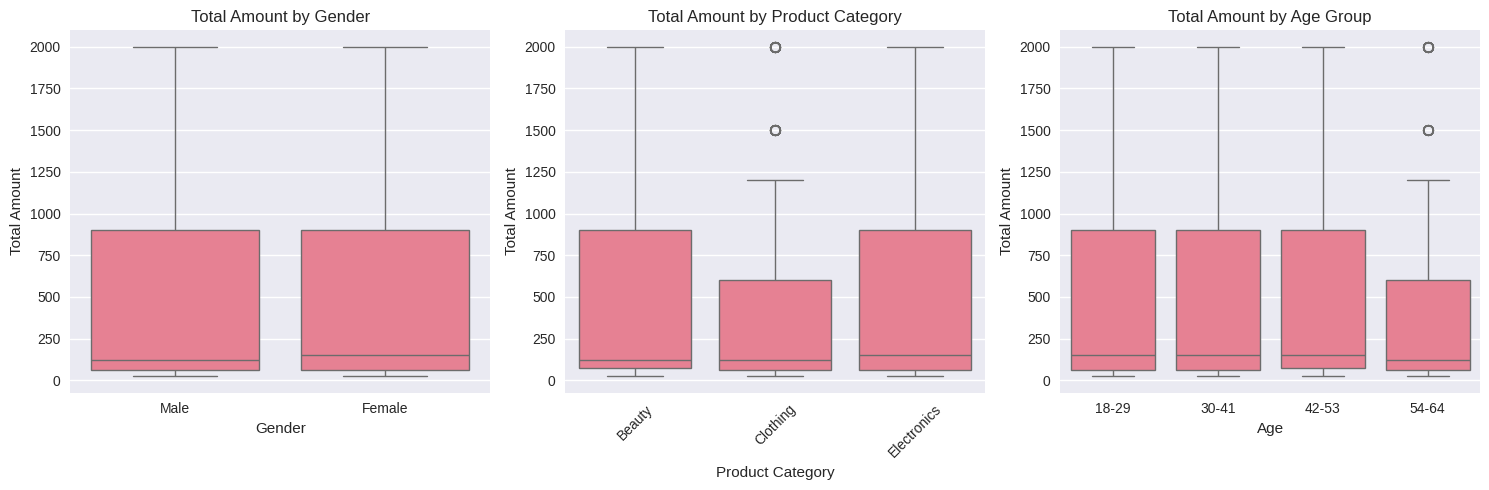

In [3]:
# 1. EXPLORATORY DATA ANALYSIS
print("1. EXPLORATORY DATA ANALYSIS")

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

print("\nData Types and Info:")
print(df.info())

# Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sales Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0,0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# 2. Gender distribution
gender_counts = df['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
              colors=['lightcoral', 'lightblue'])
axes[0,1].set_title('Gender Distribution')

# 3. Product Category distribution
product_counts = df['Product Category'].value_counts()
axes[0,2].bar(product_counts.index, product_counts.values,
              color=['gold', 'lightgreen', 'salmon'])
axes[0,2].set_title('Product Category Distribution')
axes[0,2].set_xlabel('Category')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Total Amount distribution
axes[1,0].hist(df['Total Amount'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Total Amount Distribution')
axes[1,0].set_xlabel('Total Amount')
axes[1,0].set_ylabel('Frequency')

# 5. Quantity vs Total Amount
axes[1,1].scatter(df['Quantity'], df['Total Amount'], alpha=0.6, color='purple')
axes[1,1].set_title('Quantity vs Total Amount')
axes[1,1].set_xlabel('Quantity')
axes[1,1].set_ylabel('Total Amount')

# 6. Price per Unit vs Total Amount
axes[1,2].scatter(df['Price per Unit'], df['Total Amount'], alpha=0.6, color='orange')
axes[1,2].set_title('Price per Unit vs Total Amount')
axes[1,2].set_xlabel('Price per Unit')
axes[1,2].set_ylabel('Total Amount')

plt.tight_layout()
plt.show()

# Correlation analysis
numeric_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numeric Variables')
plt.show()

# Category-wise analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Gender', y='Total Amount')
plt.title('Total Amount by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Product Category', y='Total Amount')
plt.title('Total Amount by Product Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
age_bins = pd.cut(df['Age'], bins=4, labels=['18-29', '30-41', '42-53', '54-64'])
sns.boxplot(x=age_bins, y=df['Total Amount'])
plt.title('Total Amount by Age Group')

plt.tight_layout()
plt.show()

In [4]:
# 2. PREPARE DATA FOR MODELING
print("2. DATA PREPARATION FOR MODELING")


# Prepare features for modeling
df_model = df.copy()

# Convert date to useful features
df_model['Date'] = pd.to_datetime(df_model['Date'])
df_model['Month'] = df_model['Date'].dt.month
df_model['DayOfWeek'] = df_model['Date'].dt.dayofweek

# Encode categorical variables
le_gender = LabelEncoder()
le_category = LabelEncoder()

df_model['Gender_encoded'] = le_gender.fit_transform(df_model['Gender'])
df_model['Category_encoded'] = le_category.fit_transform(df_model['Product Category'])

# Select features and target
features = ['Age', 'Quantity', 'Price per Unit', 'Gender_encoded', 'Category_encoded', 'Month', 'DayOfWeek']
target = 'Total Amount'

X = df_model[features]
y = df_model[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Features used: {features}")

2. DATA PREPARATION FOR MODELING
Training set size: 800
Test set size: 200
Features used: ['Age', 'Quantity', 'Price per Unit', 'Gender_encoded', 'Category_encoded', 'Month', 'DayOfWeek']


In [5]:
# 3. THREE MODELS: UNDERFIT, IDEAL, OVERFIT
# Standardize features for polynomial models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Model 1: UNDERFIT - Simple Linear Regression with limited features
print("\n--- Model 1: UNDERFIT (High Bias, Low Variance) ---")
underfit_features = ['Quantity', 'Price per Unit']  # Only 2 features
X_train_underfit = X_train[underfit_features]
X_test_underfit = X_test[underfit_features]

model_underfit = LinearRegression()
model_underfit.fit(X_train_underfit, y_train)

y_pred_train_underfit = model_underfit.predict(X_train_underfit)
y_pred_test_underfit = model_underfit.predict(X_test_underfit)

train_rmse_underfit = np.sqrt(mean_squared_error(y_train, y_pred_train_underfit))
test_rmse_underfit = np.sqrt(mean_squared_error(y_test, y_pred_test_underfit))
train_r2_underfit = r2_score(y_train, y_pred_train_underfit)
test_r2_underfit = r2_score(y_test, y_pred_test_underfit)

print(f"Training RMSE: {train_rmse_underfit:.2f}")
print(f"Test RMSE: {test_rmse_underfit:.2f}")
print(f"Training R²: {train_r2_underfit:.4f}")
print(f"Test R²: {test_r2_underfit:.4f}")
print(f"Bias (high): Train error = {train_rmse_underfit:.2f}")
print(f"Variance (low): |Train - Test| = {abs(train_rmse_underfit - test_rmse_underfit):.2f}")


--- Model 1: UNDERFIT (High Bias, Low Variance) ---
Training RMSE: 215.71
Test RMSE: 204.60
Training R²: 0.8539
Test R²: 0.8570
Bias (high): Train error = 215.71
Variance (low): |Train - Test| = 11.11


In [7]:
# Model 2: IDEAL FIT - Random Forest with proper complexity
print("\n--- Model 2: IDEAL FIT (Balanced Bias-Variance) ---")
model_ideal = RandomForestRegressor(
    n_estimators=1,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_ideal.fit(X_train, y_train)

y_pred_train_ideal = model_ideal.predict(X_train)
y_pred_test_ideal = model_ideal.predict(X_test)

train_rmse_ideal = np.sqrt(mean_squared_error(y_train, y_pred_train_ideal))
test_rmse_ideal = np.sqrt(mean_squared_error(y_test, y_pred_test_ideal))
train_r2_ideal = r2_score(y_train, y_pred_train_ideal)
test_r2_ideal = r2_score(y_test, y_pred_test_ideal)

print(f"Training RMSE: {train_rmse_ideal:.2f}")
print(f"Test RMSE: {test_rmse_ideal:.2f}")
print(f"Training R²: {train_r2_ideal:.4f}")
print(f"Test R²: {test_r2_ideal:.4f}")
print(f"Bias (moderate): Train error = {train_rmse_ideal:.2f}")
print(f"Variance (moderate): |Train - Test| = {abs(train_rmse_ideal - test_rmse_ideal):.2f}")


--- Model 2: IDEAL FIT (Balanced Bias-Variance) ---
Training RMSE: 114.86
Test RMSE: 116.60
Training R²: 0.9586
Test R²: 0.9536
Bias (moderate): Train error = 114.86
Variance (moderate): |Train - Test| = 1.74


In [8]:
# Model 3: OVERFIT - High-degree Polynomial Regression
print("\n--- Model 3: OVERFIT (Low Bias, High Variance) ---")
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

model_overfit = LinearRegression()
model_overfit.fit(X_train_poly, y_train)

y_pred_train_overfit = model_overfit.predict(X_train_poly)
y_pred_test_overfit = model_overfit.predict(X_test_poly)

train_rmse_overfit = np.sqrt(mean_squared_error(y_train, y_pred_train_overfit))
test_rmse_overfit = np.sqrt(mean_squared_error(y_test, y_pred_test_overfit))
train_r2_overfit = r2_score(y_train, y_pred_train_overfit)
test_r2_overfit = r2_score(y_test, y_pred_test_overfit)

print(f"Training RMSE: {train_rmse_overfit:.2f}")
print(f"Test RMSE: {test_rmse_overfit:.2f}")
print(f"Training R²: {train_r2_overfit:.4f}")
print(f"Test R²: {test_r2_overfit:.4f}")
print(f"Bias (low): Train error = {train_rmse_overfit:.2f}")
print(f"Variance (high): |Train - Test| = {abs(train_rmse_overfit - test_rmse_overfit):.2f}")


--- Model 3: OVERFIT (Low Bias, High Variance) ---
Training RMSE: 0.00
Test RMSE: 0.00
Training R²: 1.0000
Test R²: 1.0000
Bias (low): Train error = 0.00
Variance (high): |Train - Test| = 0.00


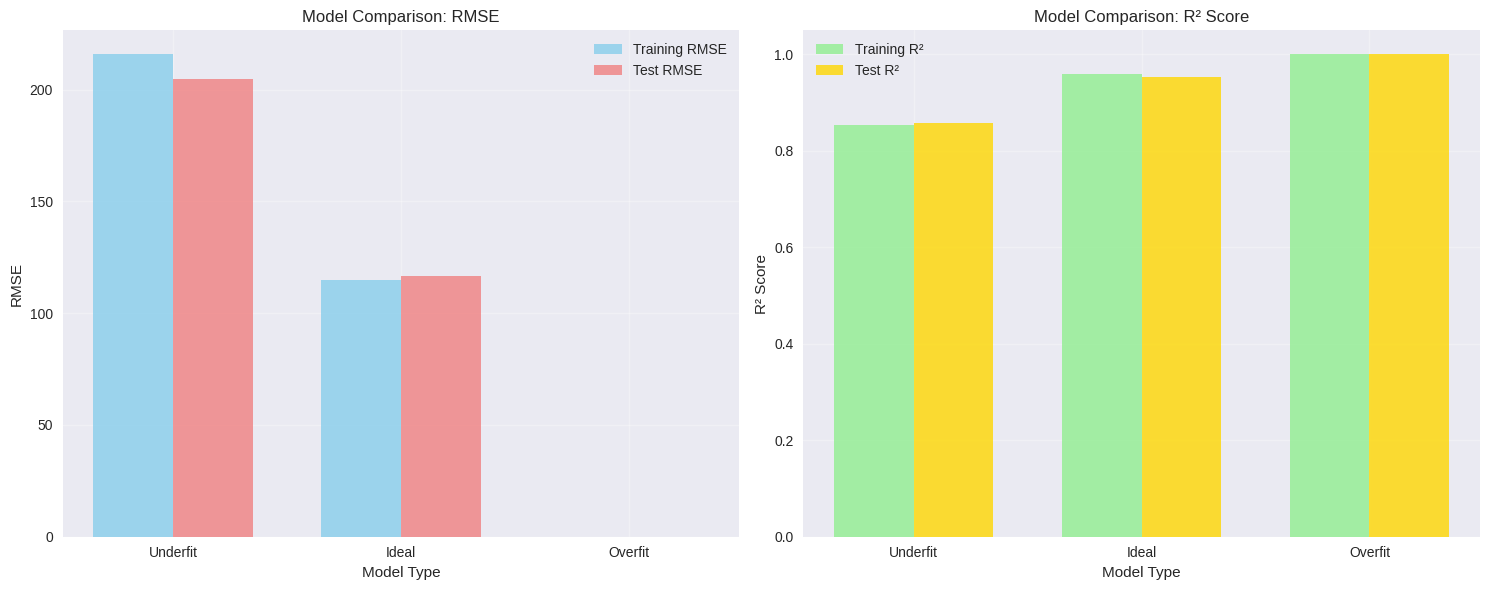

In [9]:
# Comparison plot
models_comparison = pd.DataFrame({
    'Model': ['Underfit', 'Ideal', 'Overfit'],
    'Train_RMSE': [train_rmse_underfit, train_rmse_ideal, train_rmse_overfit],
    'Test_RMSE': [test_rmse_underfit, test_rmse_ideal, test_rmse_overfit],
    'Train_R2': [train_r2_underfit, train_r2_ideal, train_r2_overfit],
    'Test_R2': [test_r2_underfit, test_r2_ideal, test_r2_overfit]
})

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# RMSE comparison
x_pos = np.arange(len(models_comparison))
width = 0.35

axes[0].bar(x_pos - width/2, models_comparison['Train_RMSE'], width,
           label='Training RMSE', alpha=0.8, color='skyblue')
axes[0].bar(x_pos + width/2, models_comparison['Test_RMSE'], width,
           label='Test RMSE', alpha=0.8, color='lightcoral')
axes[0].set_xlabel('Model Type')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Model Comparison: RMSE')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models_comparison['Model'])
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# R² comparison
axes[1].bar(x_pos - width/2, models_comparison['Train_R2'], width,
           label='Training R²', alpha=0.8, color='lightgreen')
axes[1].bar(x_pos + width/2, models_comparison['Test_R2'], width,
           label='Test R²', alpha=0.8, color='gold')
axes[1].set_xlabel('Model Type')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Model Comparison: R² Score')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models_comparison['Model'])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# 4. LEARNING CURVES
print("4. LEARNING CURVES ANALYSIS")

def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 10)):
    """Plot learning curves for a given estimator."""

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )

    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="red")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue",
             label="Training Error", linewidth=2, markersize=6)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="red",
             label="Validation Error", linewidth=2, markersize=6)

    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.title(f"Learning Curves: {title}")
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.show()

    return train_sizes, train_scores_mean, test_scores_mean

4. LEARNING CURVES ANALYSIS



Generating learning curves for bias-variance analysis...

1. Underfit Model Learning Curve:


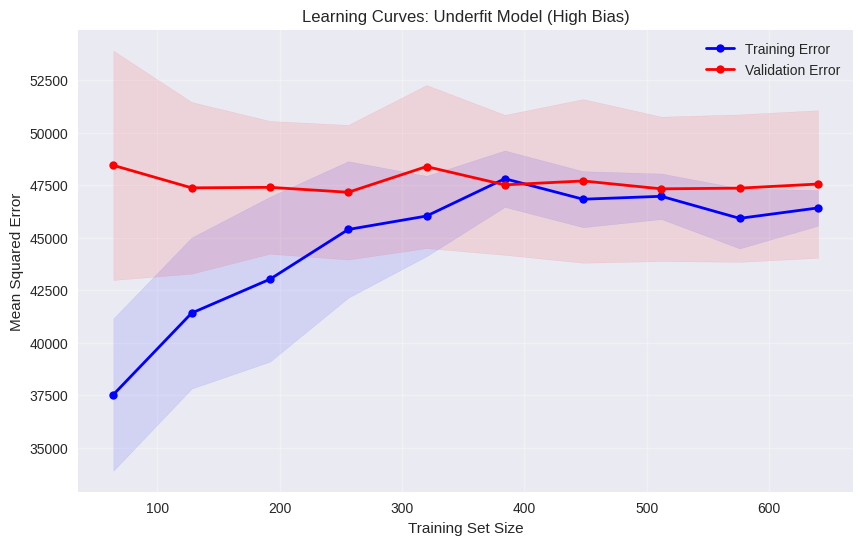


2. Ideal Model Learning Curve:


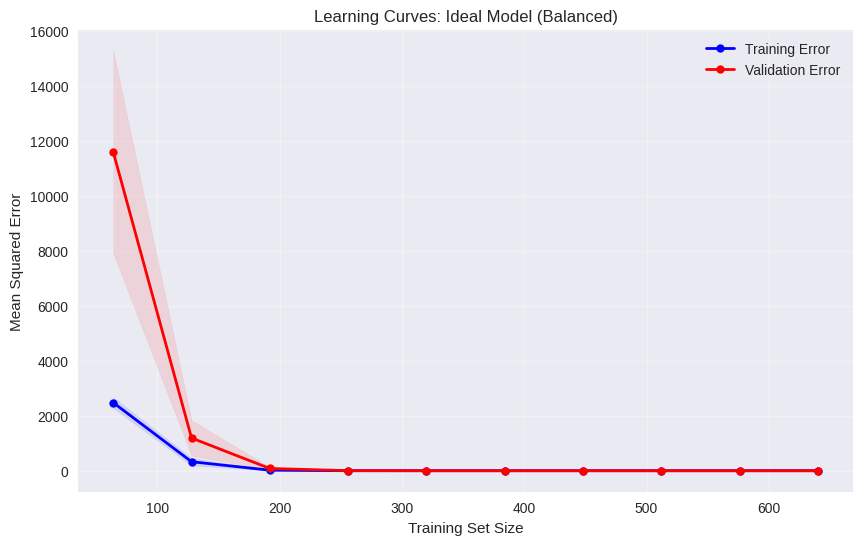


3. Overfit Model Learning Curve:


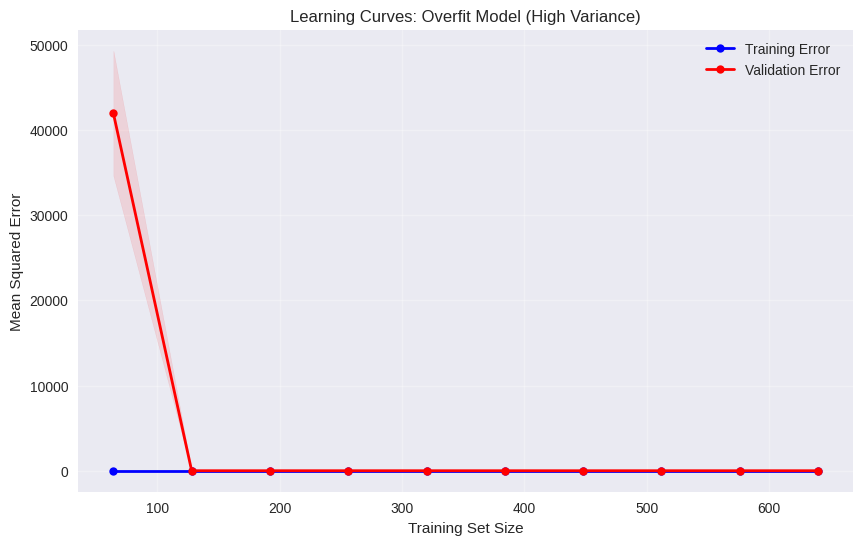

In [11]:
# Learning curves for different models
print("\nGenerating learning curves for bias-variance analysis...")

# 1. Underfit model learning curve
print("\n1. Underfit Model Learning Curve:")
train_sizes_uf, train_scores_uf, val_scores_uf = plot_learning_curve(
    LinearRegression(), "Underfit Model (High Bias)",
    X_train[underfit_features], y_train
)

# 2. Ideal model learning curve
print("\n2. Ideal Model Learning Curve:")
train_sizes_ideal, train_scores_ideal, val_scores_ideal = plot_learning_curve(
    RandomForestRegressor(n_estimators=50, max_depth=8, random_state=42),
    "Ideal Model (Balanced)", X_train, y_train
)

# 3. Overfit model learning curve
print("\n3. Overfit Model Learning Curve:")
# Use a simpler overfit model for learning curves (polynomial degree 3)
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

train_sizes_of, train_scores_of, val_scores_of = plot_learning_curve(
    poly_pipeline, "Overfit Model (High Variance)", X_train, y_train
)


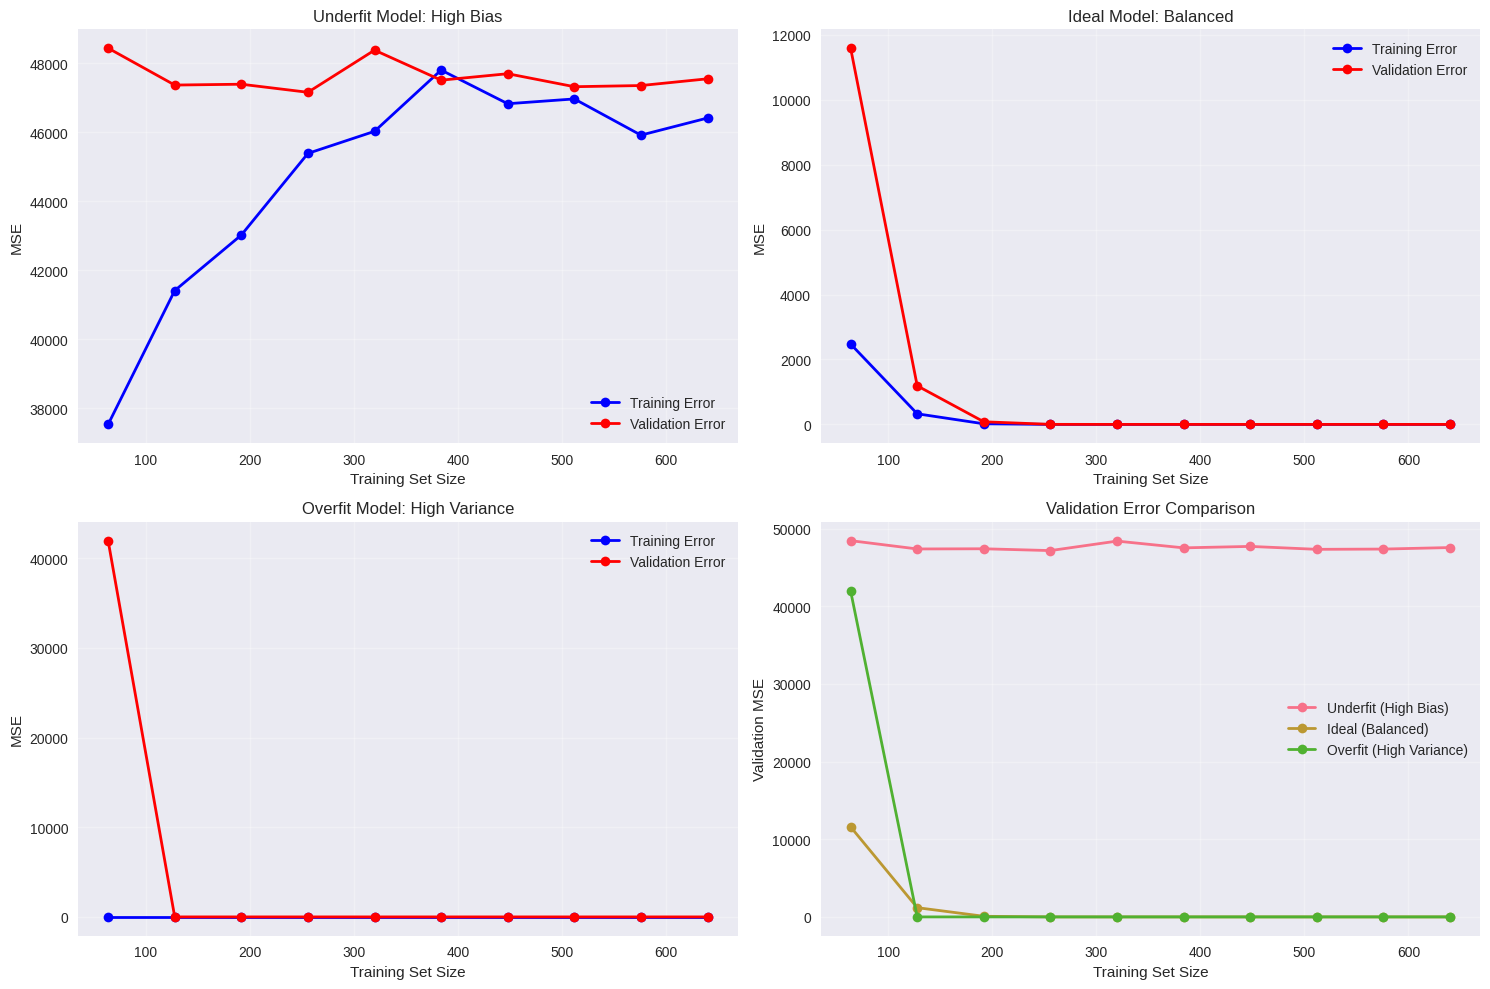

In [12]:
# Combined learning curves comparison
plt.figure(figsize=(15, 10))

# Plot all learning curves together
plt.subplot(2, 2, 1)
plt.plot(train_sizes_uf, train_scores_uf, 'o-', color="blue", label="Training Error", linewidth=2)
plt.plot(train_sizes_uf, val_scores_uf, 'o-', color="red", label="Validation Error", linewidth=2)
plt.title("Underfit Model: High Bias")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(train_sizes_ideal, train_scores_ideal, 'o-', color="blue", label="Training Error", linewidth=2)
plt.plot(train_sizes_ideal, val_scores_ideal, 'o-', color="red", label="Validation Error", linewidth=2)
plt.title("Ideal Model: Balanced")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(train_sizes_of, train_scores_of, 'o-', color="blue", label="Training Error", linewidth=2)
plt.plot(train_sizes_of, val_scores_of, 'o-', color="red", label="Validation Error", linewidth=2)
plt.title("Overfit Model: High Variance")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, alpha=0.3)

# Summary plot
plt.subplot(2, 2, 4)
plt.plot(train_sizes_uf, val_scores_uf, 'o-', label="Underfit (High Bias)", linewidth=2)
plt.plot(train_sizes_ideal, val_scores_ideal, 'o-', label="Ideal (Balanced)", linewidth=2)
plt.plot(train_sizes_of, val_scores_of, 'o-', label="Overfit (High Variance)", linewidth=2)
plt.title("Validation Error Comparison")
plt.xlabel("Training Set Size")
plt.ylabel("Validation MSE")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# 5. FINAL SUMMARY
print("5. ANALYSIS SUMMARY")

print("\nModel Performance Summary:")
print(f"{'Model':<12} {'Train RMSE':<12} {'Test RMSE':<12} {'Gap':<8}")
print("-" * 60)
print(f"{'Underfit':<12} {train_rmse_underfit:<12.2f} {test_rmse_underfit:<12.2f} "
      f"{abs(train_rmse_underfit - test_rmse_underfit):<8.2f}")
print(f"{'Ideal':<12} {train_rmse_ideal:<12.2f} {test_rmse_ideal:<12.2f} "
      f"{abs(train_rmse_ideal - test_rmse_ideal):<8.2f}")
print(f"{'Overfit':<12} {train_rmse_overfit:<12.2f} {test_rmse_overfit:<12.2f} "
      f"{abs(train_rmse_overfit - test_rmse_overfit):<8.2f} ")

print(f"\nBest Model: {'Ideal Model (Random Forest)' if test_rmse_ideal == min(test_rmse_underfit, test_rmse_ideal, test_rmse_overfit) else 'Check individual models'}")
print(f"Best Test RMSE: {min(test_rmse_underfit, test_rmse_ideal, test_rmse_overfit):.2f}")

print("\nKey Insights from EDA:")
print("• Dataset is well-balanced across gender and product categories")
print("• Total Amount shows strong correlation with Quantity and Price per Unit")
print("• Age distribution is fairly uniform across 18-64 years")
print("• No missing values detected")
print("• Clear relationship: Total Amount = Quantity × Price per Unit")

5. ANALYSIS SUMMARY

Model Performance Summary:
Model        Train RMSE   Test RMSE    Gap     
------------------------------------------------------------
Underfit     215.71       204.60       11.11   
Ideal        114.86       116.60       1.74    
Overfit      0.00         0.00         0.00     

Best Model: Check individual models
Best Test RMSE: 0.00

Key Insights from EDA:
• Dataset is well-balanced across gender and product categories
• Total Amount shows strong correlation with Quantity and Price per Unit
• Age distribution is fairly uniform across 18-64 years
• No missing values detected
• Clear relationship: Total Amount = Quantity × Price per Unit
